In [1]:
%matplotlib inline
import os
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as scio
import pandas as pd

cols = [
    'am', 'agm', 'alm', 'apm', 'aum', 'bm', 'bbm', 'bum', 'cm', 'cfm', 'csm', 'cum', 'cym', 'erm', 'fbm', 'fgm', 'fum', 'hcm', 
    'im', 'jm', 'jdm', 'jmm', 'jrm', 'lm', 'lrm', 'mm', 'mam', 'mem', 'nim', 'oim', 'pm', 'pbm', 'pmm', 'ppm', 'rbm', 'rim', 
    'rmm', 'rom', 'rsm', 'rum', 'sfm', 'smm', 'snm', 'srm', 'tam', 'tcm', 'vm', 'whm', 'wrm', 'wsm', 'ym', 'zcm', 'znm', 'ap', 
    'agp', 'alp', 'app', 'aup', 'bp', 'bbp', 'bup', 'cp', 'cfp', 'csp', 'cup', 'cyp', 'erp', 'fbp', 'fgp', 'fup', 'hcp', 'ip', 
    'jp', 'jdp', 'jmp', 'jrp', 'lp', 'lrp', 'mp', 'map', 'mep', 'nip', 'oip', 'pp', 'pbp', 'pmp', 'ppp', 'rbp', 'rip', 'rmp', 
    'rop', 'rsp', 'rup', 'sfp', 'smp', 'snp', 'srp', 'tap', 'tcp', 'vp', 'whp', 'wrp', 'wsp', 'yp', 'zcp', 'znp', 'fund'
]

vari2name = {
    'a': '豆一', 'ag': '沪银', 'al': '沪铝', 'ap': '苹果', 'au': '沪金', 'b': '豆二', 'bb': '胶合板', 'bu': '沥青', 'c': '玉米', 
    'cf': '郑棉', 'cs': '玉米淀粉', 'cu': '沪铜', 'cy': '棉纱', 'er': '早籼稻(ER)', 'fb': '纤维板', 'fg': '玻璃', 'fu': '燃油', 
    'hc': '热轧卷板', 'i': '铁矿石', 'j': '焦炭', 'jd': '鸡蛋', 'jm': '焦煤', 'jr': '粳稻', 'l': '塑料', 'lr': '晚籼稻', 'm': '豆粕', 
    'ma': '甲醇(MA)', 'me': '甲醇(ME)', 'ni': '沪镍', 'oi': '菜油(OI)', 'p': '棕榈油', 'pb': '沪铅', 'pm': '普麦', 'pp': '聚丙烯', 
    'rb': '螺纹钢', 'ri': '早籼稻(RI)', 'rm': '菜粕', 'ro': '菜油(RO)', 'rs': '菜籽', 'ru': '橡胶', 'sf': '硅铁', 'sm': '锰硅', 
    'sn': '沪锡', 'sr': '白糖', 'ta': 'PTA', 'tc': '动力煤(TC)', 'v': 'PVC', 'wh': '强麦(WH)', 'wr': '线材', 
    'ws': '强麦(WS)', 'y': '豆油', 'zc': '动力煤(ZC)', 'zn': '沪锌'
}

I,J,K = 9,9,4
CF_file = 'whole_month_log'
CF = scio.loadmat('./NTF/%s.mat' % CF_file)['M']

def decompose(coreNway, lam, no=0):
    outfile = 'out%d' % no
    funcfile = 'decompose%d' % no
    
    with open('./NTF/format.decompose', 'r') as f:
        content = f.read()
        content = content % (no, CF_file, outfile)
    
    with open('./NTF/%s.m' % funcfile, 'w') as f:
        f.write(content)
    
    os.system('matlab -r "cd NTF;decompose%d([%d,%d,%d],[%f,%f,%f,%f])";exit;' % 
              tuple([no] + coreNway + lam))
    try:
        data = scio.loadmat('./NTF/%s.mat' % outfile)
        os.remove('./NTF/%s.mat' % outfile)
    except:
        # 这种情况可能是分解失败
        data = None
    
    os.remove('./NTF/%s.m' % funcfile)
    
    return data

def RMSE(data):
    O = data['O']
    D = data['D']
    T = data['T']
    C = data['C']
    _CF = np.einsum('ijk,pi,qj,rk->pqr', C, O, D, T)
    return math.sqrt(np.mean((CF - _CF)**2))

data = decompose([I,J,K],[0.0001]*4)

print (np.mean(CF))
print (RMSE(data))

O = data['O']
D = data['D']
T = data['T']
C = data['C']

3.59042167946
1.6060946351683039


# 月份模式

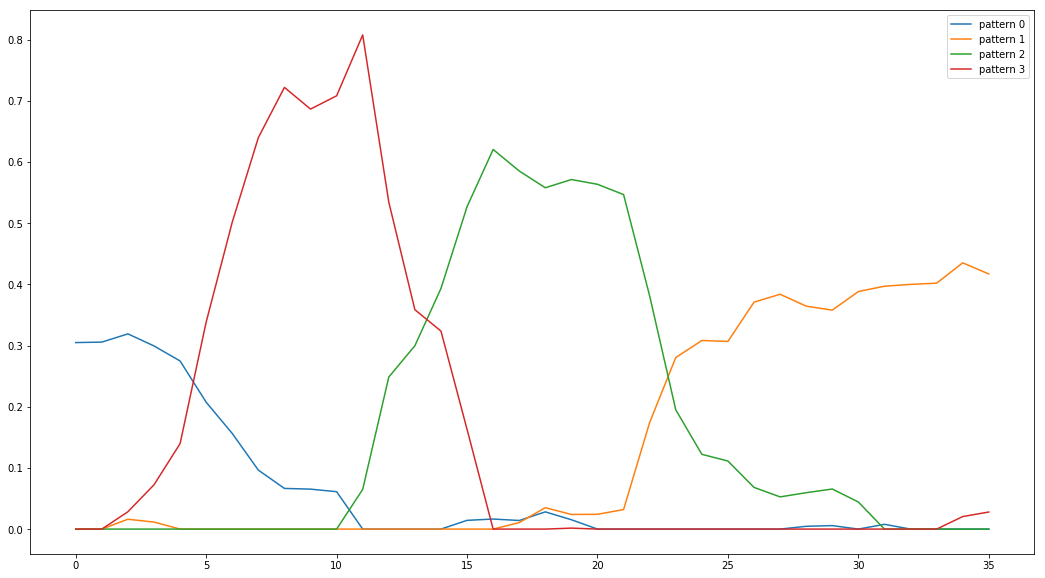

In [2]:
plt.figure(figsize=(18,10))
for i in range(K):
    plt.plot(T[:,i], label='pattern %d'%(i))
plt.legend()
plt.show()

# 源模式

In [3]:
data = [{'margin':[], 'profit':[], 'fund':[]} for i in range(I)]
for i in range(107):
    t = max(O[i])
    t = O[i].tolist().index(t)
    if cols[i][-1]=='m':
        data[t]['margin'].append(vari2name[cols[i][:-1]])
    elif cols[i][-1]=='p':
        data[t]['profit'].append(vari2name[cols[i][:-1]])
    else:
        data[t]['fund'].append('fund')
df = pd.DataFrame(data)
df

,fund,margin,profit
0,[fund],"[苹果, 棉纱, 早籼稻(ER), 菜油(RO), 线材, 强麦(WS)]","[苹果, 棉纱, 早籼稻(ER), 菜油(RO), 强麦(WS)]"
1,[],"[沥青, 纤维板, 粳稻, 普麦, 早籼稻(RI), 菜籽, 白糖]","[沪银, 沥青, 沪铜, 纤维板, 燃油, 焦煤, 粳稻, 普麦, 早籼稻(RI), 菜籽,..."
2,[],"[燃油, 沪镍]",[沪镍]
3,[],"[胶合板, 沪铜, 焦炭, 焦煤, 甲醇(ME), 橡胶]","[胶合板, 焦炭, 甲醇(ME)]"
4,[],"[沪铝, 沪铅, 沪锌]","[沪铅, 沪锌]"
5,[],"[豆二, 晚籼稻, 硅铁, 锰硅]","[豆二, 晚籼稻, 硅铁, 锰硅]"
6,[],"[沪锡, 动力煤(ZC)]","[沪锡, 动力煤(ZC)]"
7,[],"[沪金, 郑棉, 铁矿石, PTA, 动力煤(TC)]","[塑料, 动力煤(TC)]"
8,[],"[豆一, 沪银, 玉米, 玉米淀粉, 玻璃, 热轧卷板, 鸡蛋, 塑料, 豆粕, 甲醇(MA...","[豆一, 沪铝, 沪金, 玉米, 郑棉, 玉米淀粉, 玻璃, 热轧卷板, 铁矿石, 鸡蛋, ..."


# 目的模式

In [4]:
data = [{'margin':[], 'profit':[], 'fund':[]} for i in range(J)]
for i in range(107):
    t = max(D[i])
    t = D[i].tolist().index(t)
    if cols[i][-1]=='m':
        data[t]['margin'].append(vari2name[cols[i][:-1]])
    elif cols[i][-1]=='p':
        data[t]['profit'].append(vari2name[cols[i][:-1]])
    else:
        data[t]['fund'].append('fund')
df = pd.DataFrame(data)
df

,fund,margin,profit
0,[],"[沪铝, 苹果, 棉纱, 早籼稻(ER), 热轧卷板, 聚丙烯, 菜油(RO), 沪锡, 线...","[沪铝, 苹果, 棉纱, 早籼稻(ER), 热轧卷板, 菜油(RO), 沪锡, 强麦(WS)]"
1,[],"[豆二, 晚籼稻]","[豆二, 晚籼稻]"
2,[],"[沪金, 郑棉, 玻璃, 铁矿石, 棕榈油, 菜粕, PTA, 动力煤(TC)]","[沪银, 沪铜, 鸡蛋, 塑料, 橡胶, 动力煤(TC)]"
3,[],"[燃油, 沪镍, 沪铅]","[燃油, 甲醇(MA), 沪镍, 沪铅, 线材, 沪锌]"
4,[],"[豆粕, 普麦, 硅铁, 锰硅, PVC]","[焦煤, 普麦, 螺纹钢, 硅铁, 锰硅, PVC, 动力煤(ZC)]"
5,[],"[玉米, 玉米淀粉, 甲醇(MA), 白糖]","[豆一, 玉米淀粉, 豆油]"
6,[],"[豆一, 沪银, 胶合板, 沪铜, 纤维板, 焦炭, 鸡蛋, 焦煤, 塑料, 甲醇(ME),...","[沪金, 胶合板, 郑棉, 纤维板, 玻璃, 铁矿石, 焦炭, 甲醇(ME), 菜油(OI)..."
7,[],"[沥青, 粳稻, 菜油(OI), 早籼稻(RI), 菜籽, 强麦(WH), 豆油]","[沥青, 玉米, 粳稻, 豆粕, 菜籽, 白糖, 强麦(WH)]"
8,[fund],[螺纹钢],[]


# 核张量

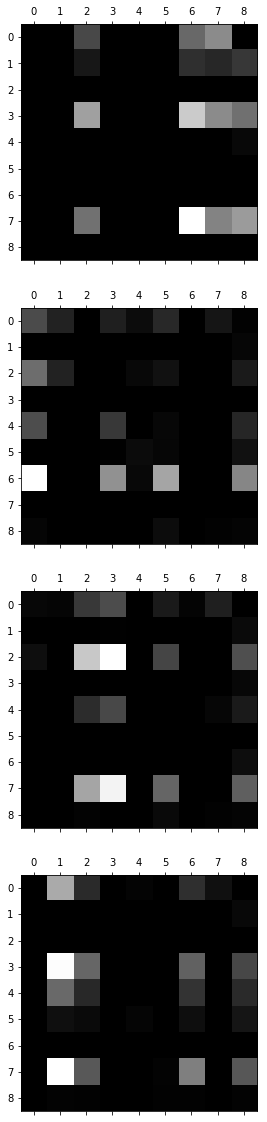

In [5]:
fig,ax = plt.subplots(nrows=K,ncols=1,figsize=(20,20))
for i in range(K):
    ax[i].matshow(C[:,:,i], cmap='gray')

加同大类、同市场的约束，类似POI的约束

In [2]:
help(scio.loadmat)

Help on function loadmat in module scipy.io.matlab.mio:

loadmat(file_name, mdict=None, appendmat=True, **kwargs)
    Load MATLAB file.
    
    Parameters
    ----------
    file_name : str
       Name of the mat file (do not need .mat extension if
       appendmat==True). Can also pass open file-like object.
    mdict : dict, optional
        Dictionary in which to insert matfile variables.
    appendmat : bool, optional
       True to append the .mat extension to the end of the given
       filename, if not already present.
    byte_order : str or None, optional
       None by default, implying byte order guessed from mat
       file. Otherwise can be one of ('native', '=', 'little', '<',
       'BIG', '>').
    mat_dtype : bool, optional
       If True, return arrays in same dtype as would be loaded into
       MATLAB (instead of the dtype with which they are saved).
    squeeze_me : bool, optional
       Whether to squeeze unit matrix dimensions or not.
    chars_as_strings : bool